<a href="https://colab.research.google.com/github/Jpickard1/Data-Analytics-for-Biomedical-Research/blob/main/Tutorial.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# A Hands-On Introduction to Data Analytics for Biomedical Research

## Importing the Proper Libraries and Example Dataset

In this tutorial, we will use the following libraries: numpy, pandas, matplotlib **ANY OTHERS (?)**
These libraries are preinstalled in google colab and can be imported with the following code:

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import ipywidgets as widgets
from ipywidgets import interact
from PIL import Image
import seaborn as sns

To use the exampledata set from UC Irvine's Machine Learning Repository, we will also need to install the ucimlrepo library

In [ ]:
!pip install ucimlrepo
from ucimlrepo import fetch_ucirepo

## Download Dataset

For this example we will be loading in a myocardial infarction complication dataset from UC Irvines's Machine Learning Repository. The dataset can be loaded and information about the dataset can be found with the following code

In [ ]:
myocardial_infarction_complications = fetch_ucirepo(id=579)

X = myocardial_infarction_complications.data.features # Split features vs predictors
y = myocardial_infarction_complications.data.targets  # Split features vs predictors
X = X.fillna(0) # This can be changed based on how we handle missing data (@Kate)
y = y.fillna(0)

print("The name of this dataset is {}".format(myocardial_infarction_complications.metadata.name))
print("The number of features in this dataset is {}".format(myocardial_infarction_complications.metadata.num_features))
print("The number of instances in this dataset is {}".format(myocardial_infarction_complications.metadata.num_instances))
print("There are {} possible targets for this dataset and they are {}\n".format(len(myocardial_infarction_complications.metadata.target_col),myocardial_infarction_complications.metadata.target_col))
print("Additional Information about this dataset \n{}".format(myocardial_infarction_complications.metadata.additional_info.summary))


The name of this dataset is Myocardial infarction complications
The number of features in this dataset is 111
The number of instances in this dataset is 1700
There are 12 possible targets for this dataset and they are ['FIBR_PREDS', 'PREDS_TAH', 'JELUD_TAH', 'FIBR_JELUD', 'A_V_BLOK', 'OTEK_LANC', 'RAZRIV', 'DRESSLER', 'ZSN', 'REC_IM', 'P_IM_STEN', 'LET_IS']

Additional Information about this dataset 
Problems of real-life complexity are needed to test and compare various data mining and pattern recognition methods. The proposed database can be used to solve two practically important problems: predicting complications of Myocardial Infarction (MI) based on information about the patient (i) at the time of admission and (ii) on the third day of the hospital period. Another important group of tasks is phenotyping of disease (cluster analysis), dynamic phenotyping (filament extraction and identification of disease trajectories) and visualisation (disease mapping). 
MI is one of the most cha

In addition, you may wish to save the figures generated in this code to your google drive. To do so, you will need to mount your google drive and specify the path for the folder which you would like to save images in

In [ ]:
from google.colab import files
from google.colab import drive
import os
drive.mount('/content/drive')

folder_path = '/content/drive/My Drive/T32_Test'
if not os.path.exists(folder_path):
    os.makedirs(folder_path)

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


# Mathematical Foundations of Data Science

## Mathematical Notations and Operations

This section introduces basic syntax for storing and manipulating matrices and vectors in Python using the `numpy` library. We begin with a simple three-line Python script to define the entries of a $3\times 3$ matrix:

In [ ]:
import numpy as np
A = np.matrix('1, 2, 3; 4 5 6; 7 8 9')
print(A)

[[1 2 3]
 [4 5 6]
 [7 8 9]]


The first line of the above code load a library called `numpy` into  of mathematical functions into our Python workspace. Functions in the `numpy` library will be accessed with the keywork `np` in our codes.
The above code defines in memory a variable `A` that stores the matrix

\begin{equation}
A =
\begin{bmatrix}
1 & 2 & 3 \\
4 & 5 & 6 \\
7 & 8 & 9
\end{bmatrix} .
\end{equation}

There is a very large list of mathematical tools built into the `numpy` package, including commonly used operations from linear algebra, such as matrix transpose:


In [ ]:
np.transpose(A)

matrix([[1, 4, 7],
        [2, 5, 8],
        [3, 6, 9]])

matrix diagonal:

In [ ]:
np.diag(A)

array([1, 5, 9])

and matrix trace:

In [ ]:
np.trace(A)

15

which is the sum of the diagonal elements 1, 5, and 9. Note that Python uses the convention that indices start with value 0. Thus the (1,1) entry is accessed as A[0,0]. The (2,3) element of A is accessed:

In [ ]:
A[1,2]

6

We can access an individual row of the matrix `A` using the following syntax

In [ ]:
A[1,:]

matrix([[4, 5, 6]])

which returns the values [4, 5, 6], which are the entries of the second row of `A`. If we think of the rows the `A` as representing coordinates of points in 3-space, then we can calculate the distance from the origin to the point [4, 5, 6] as
\begin{equation}
  \left( 4^2 + 5^2 + 6^2 \right)^{1/2} \approx 8.77
\end{equation}
using the following code

In [ ]:
np.sqrt(np.sum(np.power(A[1,:],2)))

8.774964387392123

The above command nests three `numpy` functions. The first `np.power(np.power(A[1,:],2)` raises each entry of the second row of the matrix `A` to the power of 2. The second `np.sum()` sums the entries. The third `np.sqrt()` returns the square root of its argument. To calculate the distance between points represented by the first and third rows of `A`, we compute
\begin{equation}
  \sqrt{ \left(a_{11} - a_{31} \right)^2 + \left(a_{12} - a_{32} \right)^2 + \left(a_{13} - a_{33} \right)^2 }
\end{equation}
or, in Python,

In [ ]:
np.sqrt(np.sum(np.power(A[0,:] - A[2,:],2)))

10.392304845413264

## Norms and Distances

### Cleve's Example

Distance Matrix:
[[ 0.         50.15974482  6.          5.38516481 23.32380758  7.07106781]
 [50.15974482  0.         44.72135955 54.12023651 27.20294102 56.79788728]
 [ 6.         44.72135955  0.          9.43398113 18.43908891 12.08304597]
 [ 5.38516481 54.12023651  9.43398113  0.         27.80287755  3.        ]
 [23.32380758 27.20294102 18.43908891 27.80287755  0.         30.23243292]
 [ 7.07106781 56.79788728 12.08304597  3.         30.23243292  0.        ]]


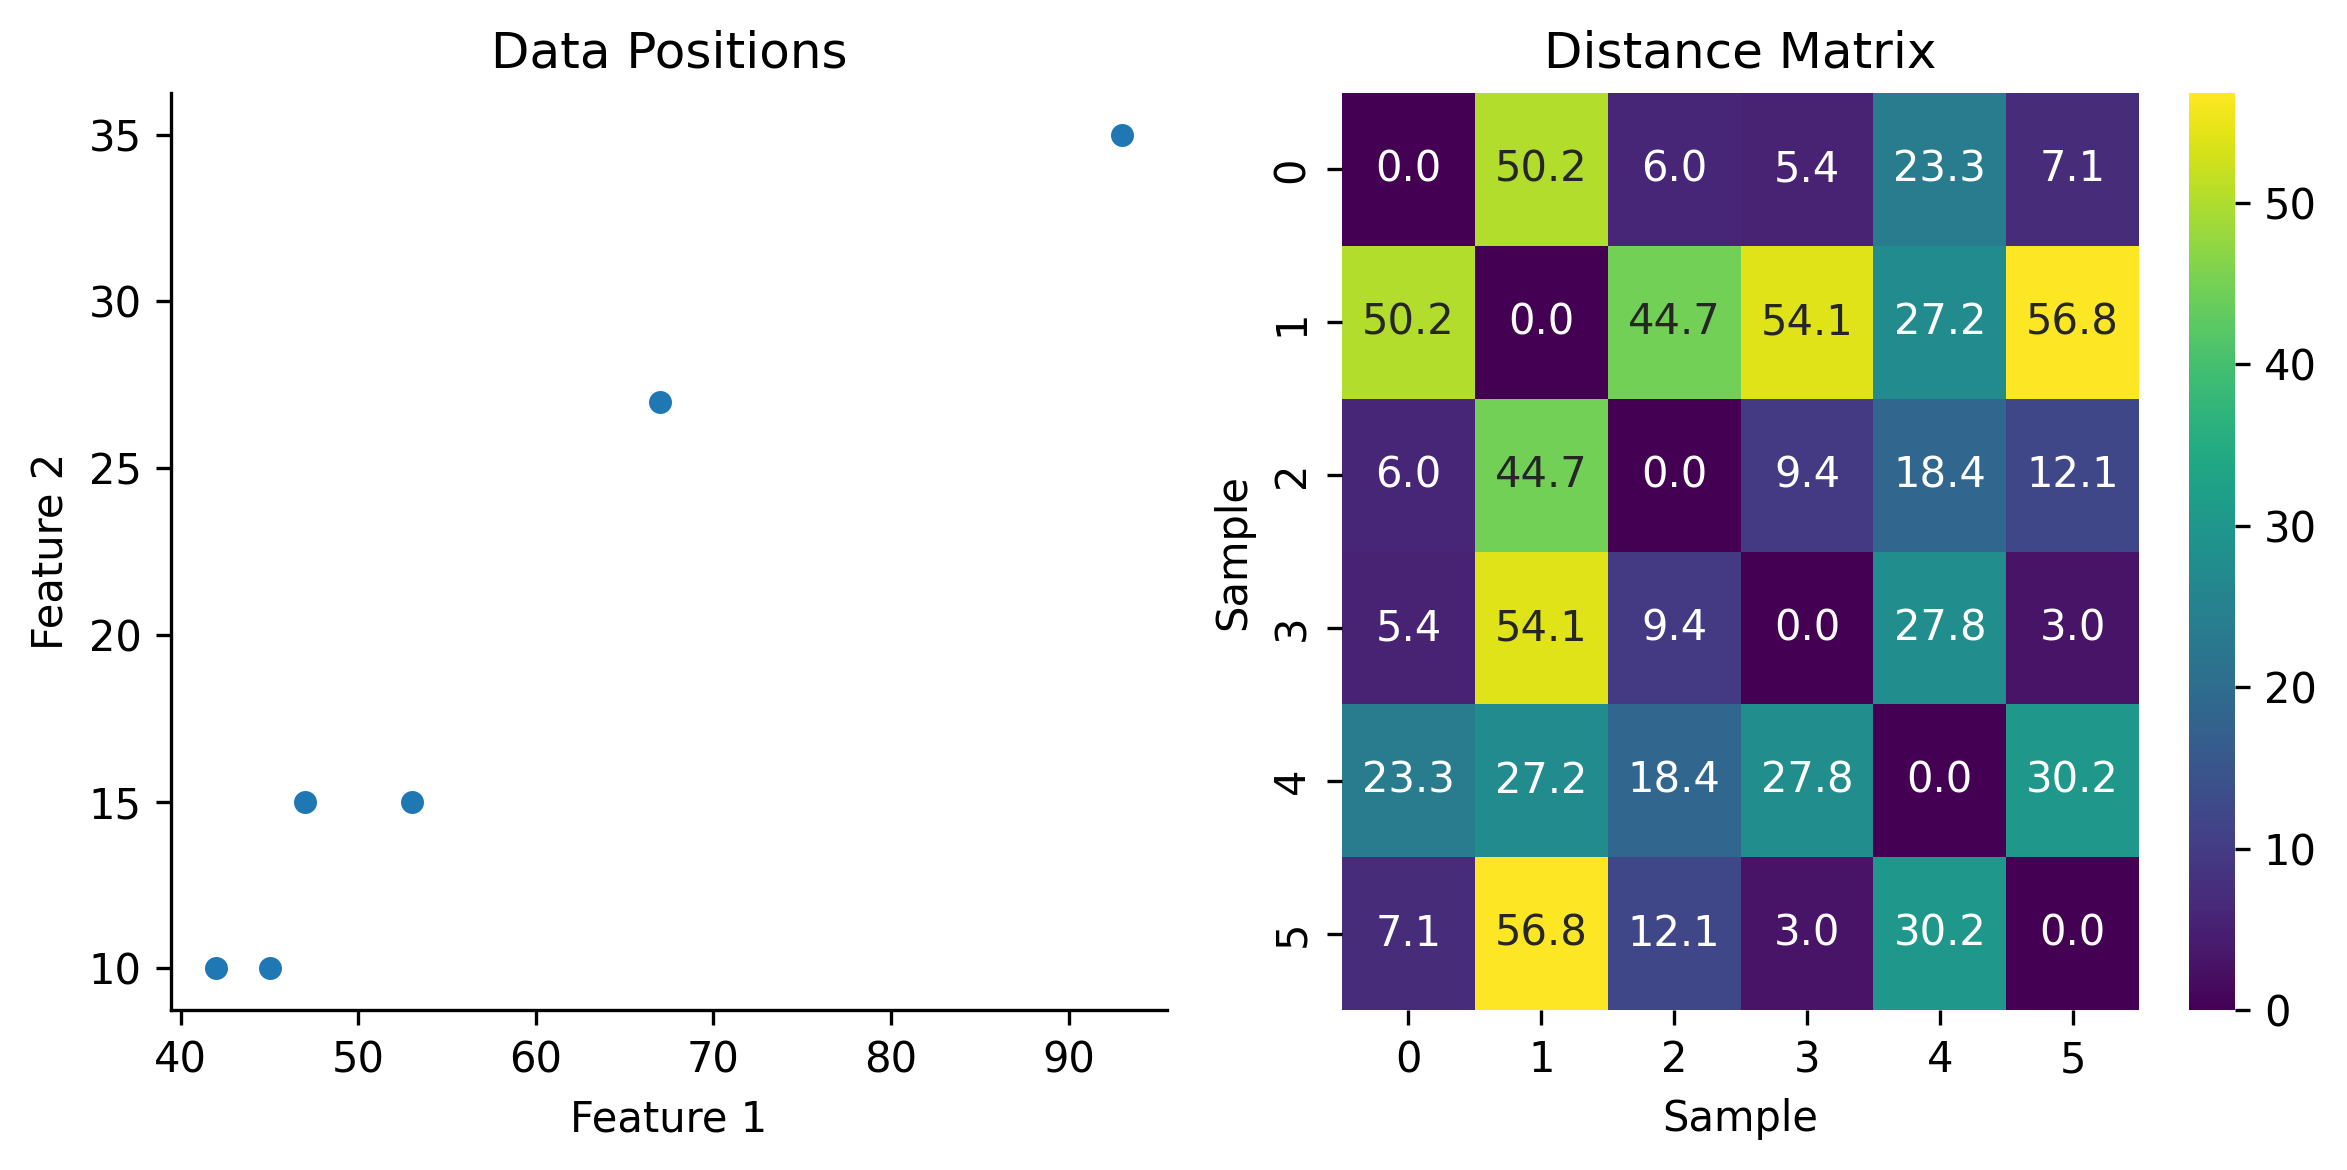

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.spatial.distance import pdist, squareform

# Define the numpy array correctly
A = np.array([
  [47, 15],
  [93, 35],
  [53, 15],
  [45, 10],
  [67, 27],
  [42, 10]
])

# Compute the pairwise distance matrix
D = squareform(pdist(A, metric='euclidean'))

# Print the distance matrix with numbers
print("Distance Matrix:")
print(D)

# Plot the distance matrix as numbers
fig, axs = plt.subplots(1,2, figsize=(8, 4), dpi=300)
sns.heatmap(D, annot=True, fmt=".1f", cmap="viridis", ax=axs[1])
sns.scatterplot(x=A[:, 0], y=A[:, 1], ax=axs[0])
axs[0].set_xlabel('Feature 1')
axs[0].set_ylabel('Feature 2')

axs[1].set_xlabel('Sample')
axs[1].set_ylabel('Sample')

sns.despine(ax=axs[0])

axs[0].set_title("Data Positions")
axs[1].set_title("Distance Matrix")
plt.tight_layout()
plt.savefig('distance-matrix.png')
plt.show()


## Distances on the dataset

In [ ]:
myocardial_infarction_complications = fetch_ucirepo(id=579)
X = myocardial_infarction_complications.data.features # Split features vs predictors
X[np.isnan(X)] = 0

<ipython-input-5-ad1b42e04a34>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[np.isnan(X)] = 0
<ipython-input-5-ad1b42e04a34>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[np.isnan(X)] = 0


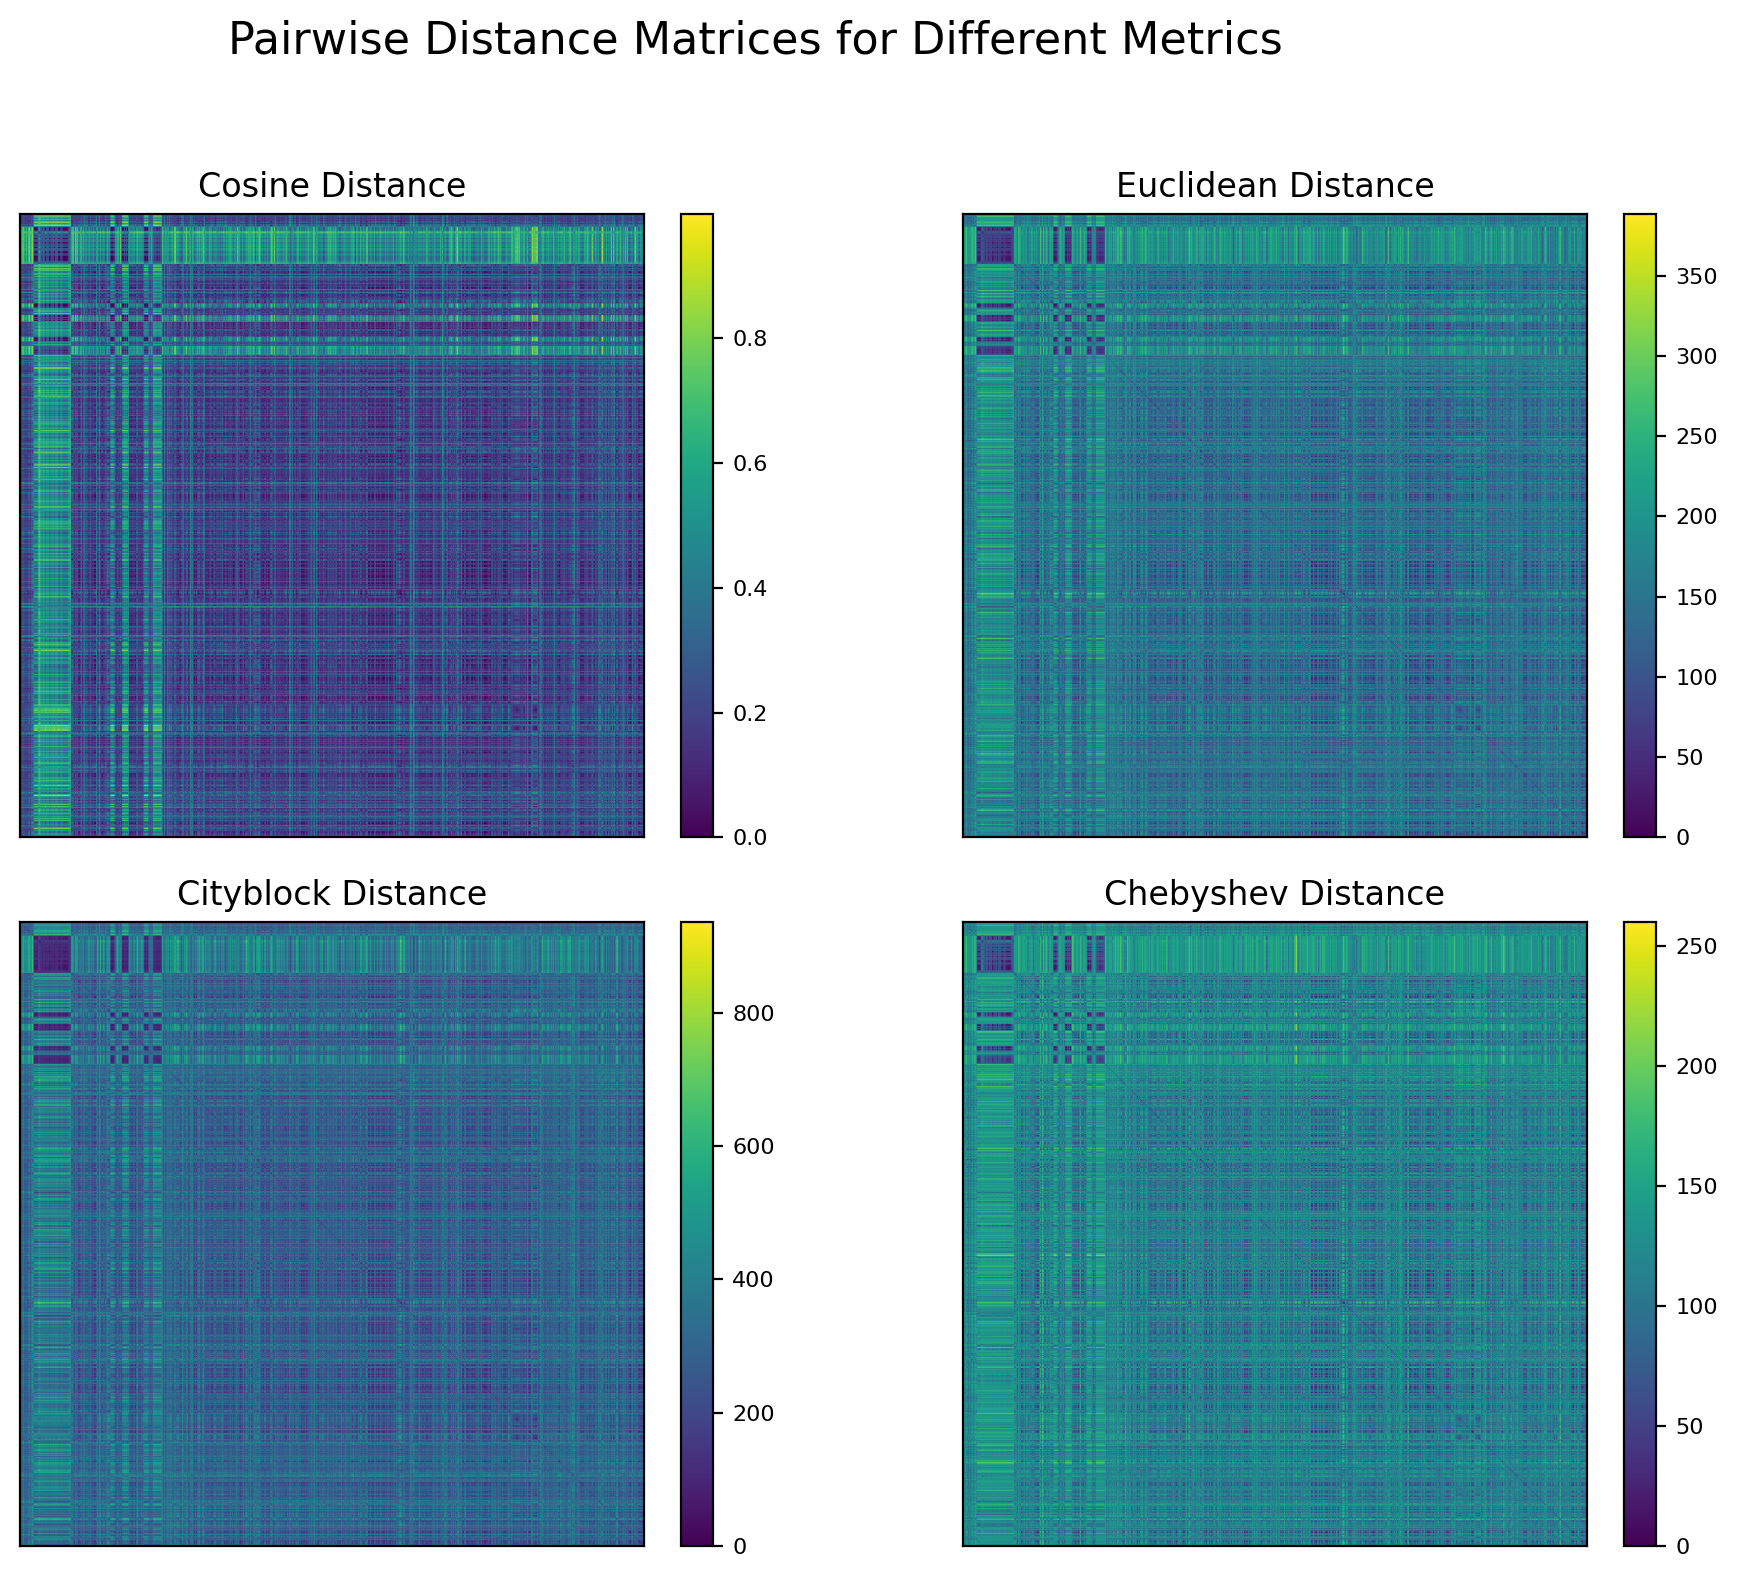

In [ ]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
import matplotlib.pyplot as plt

metrics = ['cosine', 'euclidean', 'cityblock', 'chebyshev']  # cityblock = Manhattan distance

# Create a 2x2 grid of subplots
fig, axes = plt.subplots(2, 2, figsize=(10, 8), dpi=200)
fig.suptitle("Pairwise Distance Matrices for Different Metrics", fontsize=16)

# Loop through each metric and plot the corresponding distance matrix
for i, metric in enumerate(metrics):
    # Compute pairwise distance matrix
    distance_matrix = squareform(pdist(X, metric=metric))

    # Plot the distance matrix
    ax = axes[i // 2, i % 2]
    im = ax.imshow(distance_matrix, cmap='viridis')
    ax.set_title(f"{metric.capitalize()} Distance", fontsize=12)

    # Remove x and y tick marks for a cleaner look
    ax.set_xticks([])
    ax.set_yticks([])

    # Add a smaller colorbar to the right of each subplot
    cbar = fig.colorbar(im, ax=ax, fraction=0.046, pad=0.04)
    cbar.ax.tick_params(labelsize=8)

# Adjust layout
plt.tight_layout(rect=[0, 0, 1, 0.95])
plt.savefig('data-distance-matrices.png')
plt.show()


## Singular Value Decomposition and Principal Component Analysis

In [ ]:
U, Sigma, Vt = np.linalg.svd(X)

In this section, we walk through an example of PCA using two features from the myocardial dataset. We chose two continous variables (systolic blood pressure measure by the intesive care unit and systolic blood pressure measured by the emergency cardiology team). In order to run this analysis, we remove all NaN values and 0 values that are either missing or physiological inaccurate.

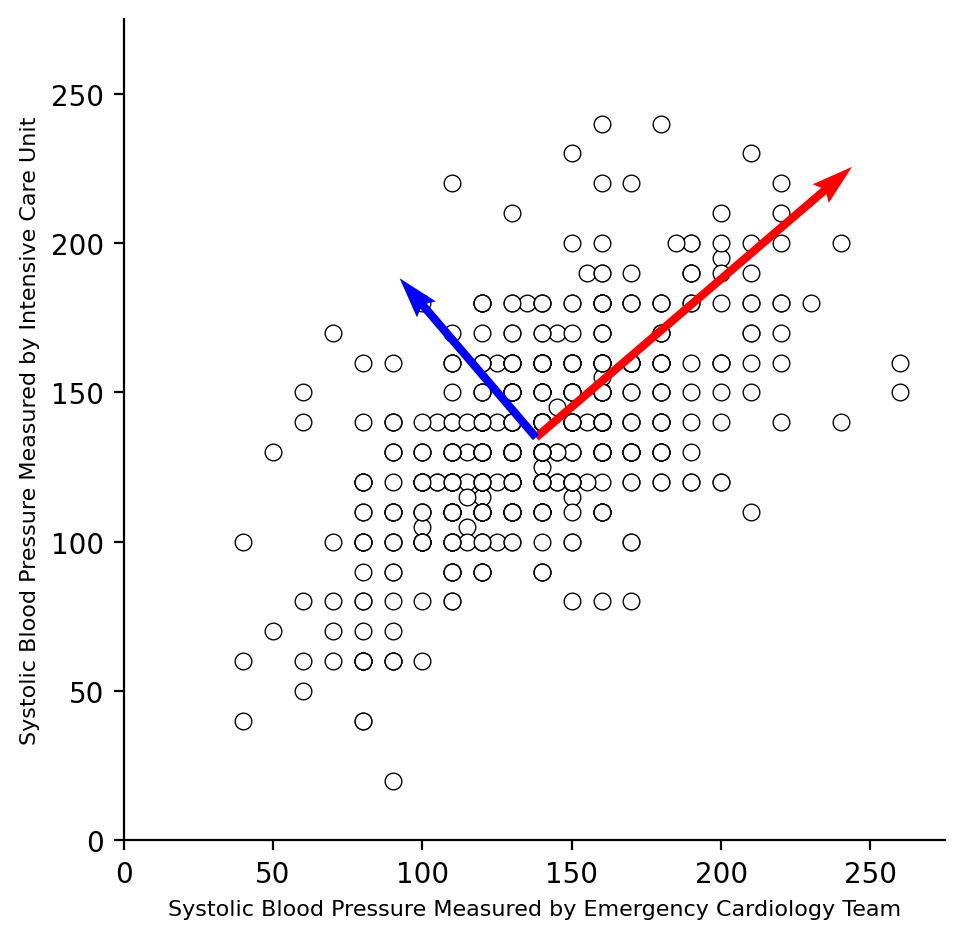

In [ ]:
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

var1="S_AD_KBRIG"
var2="S_AD_ORIT"


X_SBP=X[['S_AD_KBRIG', 'S_AD_ORIT']]

#removes patients with NaN for either value
X_SBP_reduced=X_SBP.dropna()

#removes patients with 0 for either value
X_SBP_reduced2 = X_SBP_reduced[(X_SBP_reduced != 0).all(axis=1)]

pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_SBP_reduced2)

 # Scale the principal component vector by the square root of its explained variance
scaled_vec0 = np.sqrt(pca.explained_variance_[0]) * pca.components_[0]
scaled_vec1 = np.sqrt(pca.explained_variance_[1]) * pca.components_[1]

# ax=X_SBP_reduced2.plot.scatter(x=var1, y=var2, style='o',color='k', label=None)
fig, ax = plt.subplots(1,1,dpi=200)
sns.scatterplot(
    data=X_SBP_reduced2,
    x=var1,
    y=var2,
    ax=ax,
    marker='o',
    color='w',
    edgecolor='k',
    label=None
)
ax.set_xlabel(var1)
ax.set_ylabel(var2)
ax.set_xlim(0, 275)
ax.set_ylim(0, 275)
ax.set_xlabel('Systolic Blood Pressure Measured by Emergency Cardiology Team', fontsize=8)
ax.set_ylabel('Systolic Blood Pressure Measured by Intensive Care Unit', fontsize=8)

plt.quiver(pca.mean_[0], pca.mean_[1], scaled_vec0[0], scaled_vec0[1],
          angles='xy', scale_units='xy', scale=0.3, width=0.01, color='r', label=f'PCA 1')
plt.quiver(pca.mean_[0], pca.mean_[1], scaled_vec1[0], scaled_vec1[1],
          angles='xy', scale_units='xy', scale=0.3, width=0.01, color='b', label=f'PCA 2')

plt.gca().set_aspect('equal', adjustable='box')
sns.despine()
plt.tight_layout()
plt.savefig('PCA.png')
plt.show()


# Dimensionality Reduction

In [ ]:
##Extracting the independent variable types to remove categorical features

#access variable information and filter for intedpenent features
variables=myocardial_infarction_complications.variables.loc[:,["name","type","role"]]
variables=variables[variables.role == "Feature"]

#summary table of variable types in the dataset
variables.type.value_counts()

#remove categorical variables prior to dimensionality reduction, as their distance values may not be mathematically meaningful
variables=variables[variables.type!="Categorical"]
noCats=X.loc[:,list(set(X.columns)&set(variables.name))]

print("Dimensions of non-categorical feature data: ", noCats.shape)

Dimensions of non-categorical feature data:  (1700, 95)


The output of PCA retains the same dimensionality as the original dataset:  (1700, 26)

However, instead of 95 named variables, each of the 1700 observations is defined by 95 orthogonal principal components.

The first principal component represents the axis of greatest variation in the data, with each subsequent component capturing less than the one before it.

The extent of this captured variance can be visualized using a scree plot, shown below.



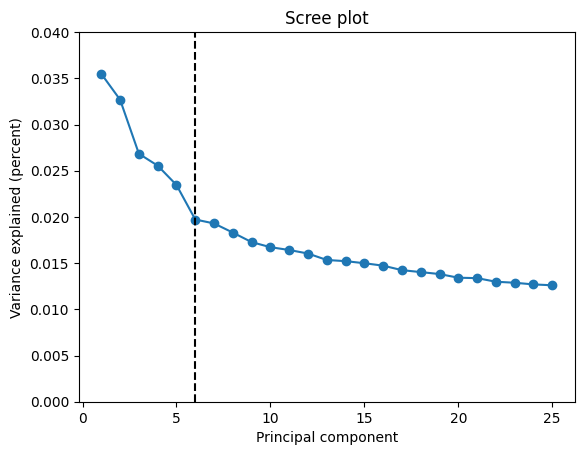


Total variance explained by first 25 principal components: 44.81%

Total variance explained by first 6 principal components: 16.37%


In [ ]:
##run PCA on the dataset
# already loaded dependencies above
# from sklearn.preprocessing import StandardScaler
# from sklearn.decomposition import PCA


#Center and scale data using StandardScaler function
scaled_noCats = StandardScaler().fit_transform(noCats)

#Run PCA on the scaled data
pca=PCA(n_components=26)
pca_embedding=pca.fit_transform(scaled_noCats)


print("The output of PCA retains the same dimensionality as the original dataset: ",pca_embedding.shape)
print("\nHowever, instead of 95 named variables, each of the 1700 observations is defined by 95 orthogonal principal components.")
print("\nThe first principal component represents the axis of greatest variation in the data, with each subsequent component capturing less than the one before it.")
print("\nThe extent of this captured variance can be visualized using a scree plot, shown below.\n")



#Select number of PCs to include on scree plot (up to 95), which plots the principal components against their corresponding eigenvalues.
#Each eigenvalue is proportional to the dataset variance explained by its respective principal component.

#number of components to plot
n_comp=25

#Cutoff variable to select "elbow" in scree plot,
cutoff=6


plt.plot(np.array(range(1,n_comp+1)),pca.explained_variance_ratio_[0:n_comp])
plt.scatter(np.array(range(1,n_comp+1)),pca.explained_variance_ratio_[0:n_comp])

plt.title("Scree plot")
plt.xlabel("Principal component")
plt.ylabel("Variance explained (percent)")
plt.ylim(0,0.04)
plt.axvline(x=cutoff,color='k',linestyle='--')
plt.savefig("NonCat_data_PCA_scree.png")
plt.show()
# plt.savefig("NonCat_data_PCA_scree.png")

print(f"\nTotal variance explained by first {n_comp} principal components: {pca.explained_variance_ratio_[0:n_comp].sum() * 100:.2f}%")
print(f"\nTotal variance explained by first {cutoff} principal components: {pca.explained_variance_ratio_[0:cutoff].sum() * 100:.2f}%")


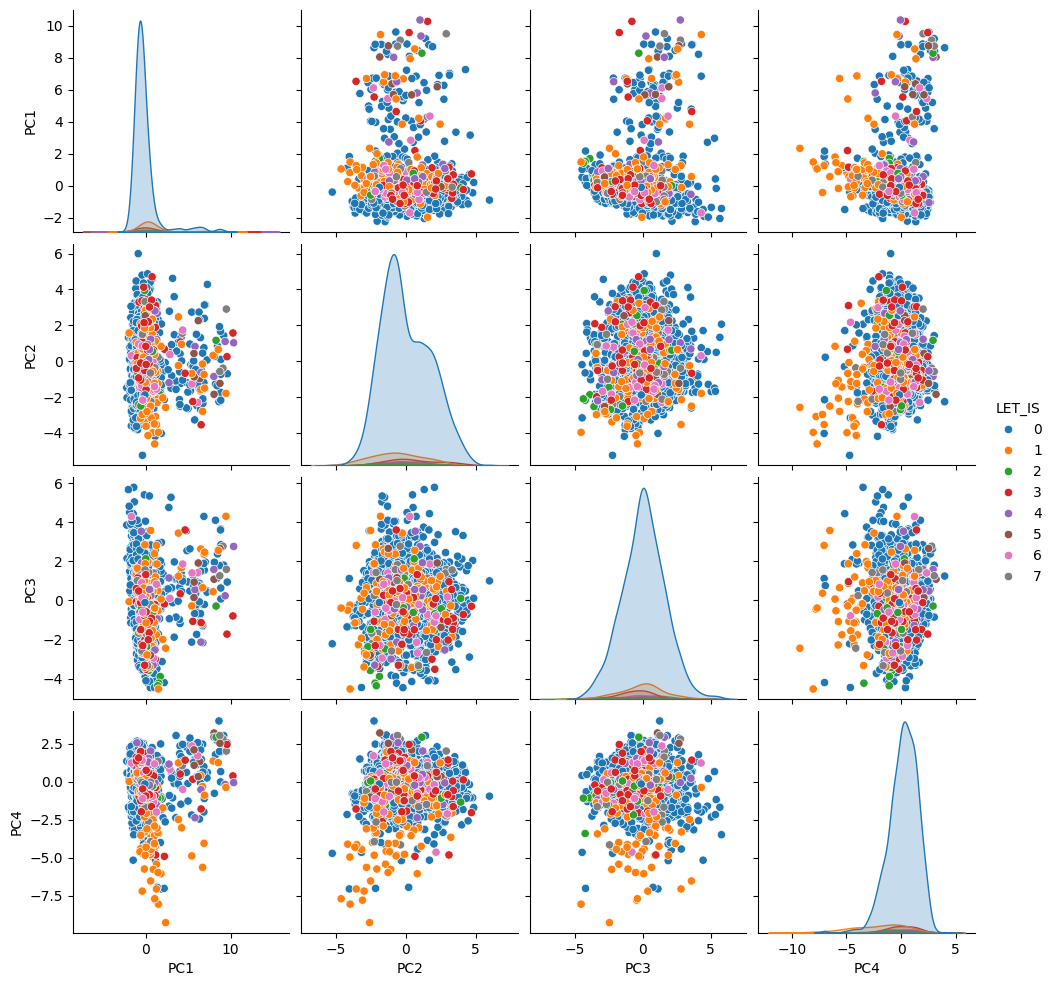

In [ ]:
#Convert PCA embeddings matrix to pandas DataFrame and add patient lethal outcome column (LET_IS)
pca_embedding=pd.DataFrame(pca_embedding).iloc[:,0:4]
col_names=list()

for i in range(pca_embedding.shape[1]):
  col_names.append("PC"+str(i+1))

pca_embedding.columns=col_names
pca_embedding["LET_IS"]=y.LET_IS.astype("category")


##Plot first four principal components against each other in grid view

import seaborn as sns

sns_plot=sns.pairplot(pca_embedding,hue="LET_IS")
fig = sns_plot.fig
fig.savefig("PCA_pairplot.png")

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


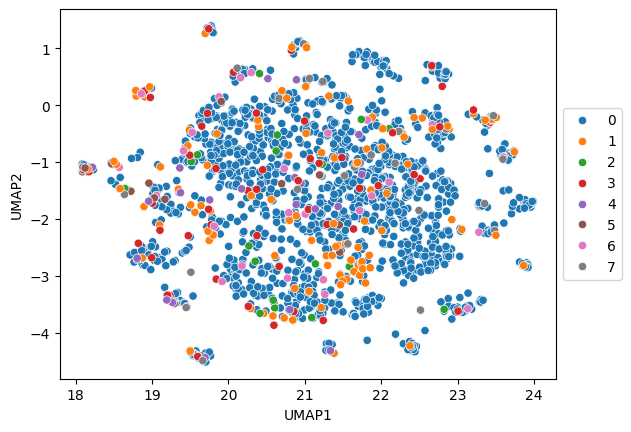

In [ ]:
#Plotting UMAP of data with default parameters
# !pip install umap-learn
import umap.umap_ as umap

reducer=umap.UMAP(random_state=10,n_neighbors=250)
umap_embedding = reducer.fit_transform(scaled_noCats)
umap_embedding=pd.DataFrame(data=umap_embedding)
umap_embedding.columns=["UMAP1","UMAP2"]
umap_embedding["LET_IS"]=y.LET_IS.astype("category")

g=sns.scatterplot(data=umap_embedding,x="UMAP1",y="UMAP2",hue="LET_IS")
g.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1)



/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.10/dist-packages/sklearn/manifold/_spectral_embedding.py:329: UserWarning: Graph is not fully connected, spectral embedding may not work as expected.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for p

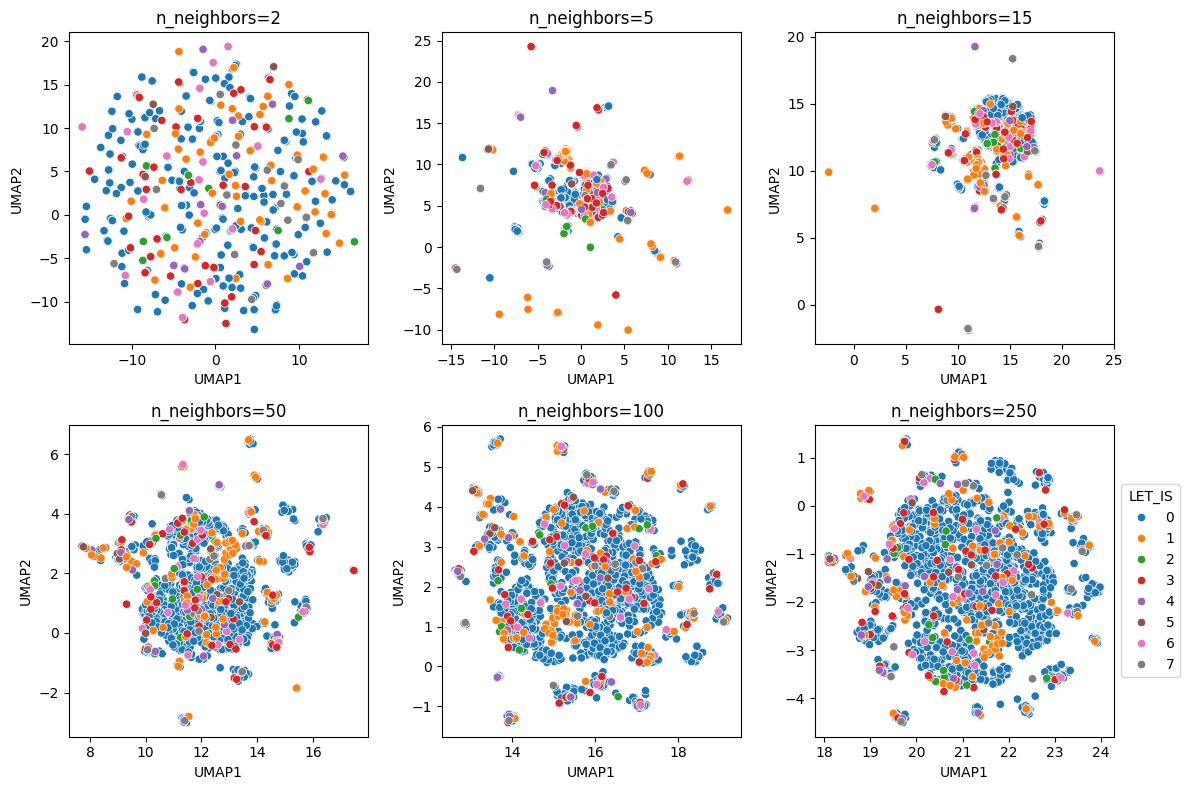

In [ ]:
#Adjusting n_neighbors parameter to alter UMAP output
#Cannot figure out why additional 1 is being added to the legend
i=1
ncol=3
nrow=2
plt.figure(figsize=(12, 8))

for n in [2,5,15,50,100,250]:
  plt.subplot(nrow, ncol, i)
  reducer=umap.UMAP(n_neighbors=n,random_state=10)
  umap_embedding = reducer.fit_transform(scaled_noCats)
  umap_embedding=pd.DataFrame(data=umap_embedding)
  umap_embedding.columns=["UMAP1","UMAP2"]
  umap_embedding["LET_IS"]=y.LET_IS.astype("category")
  sns.scatterplot(data=umap_embedding,x="UMAP1",y="UMAP2",hue="LET_IS").set(title=f"n_neighbors={n}")
  plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),ncol=1,title="LET_IS")
  if i!=6:
    plt.legend().remove()
  i+=1

plt.tight_layout()
plt.savefig('UMAP_nneighbors.png')
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),ncol=1,title="LET_IS")
plt.show()

# plt.savefig('UMAP_nneighbors.png')

/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(
/usr/local/lib/python3.10/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


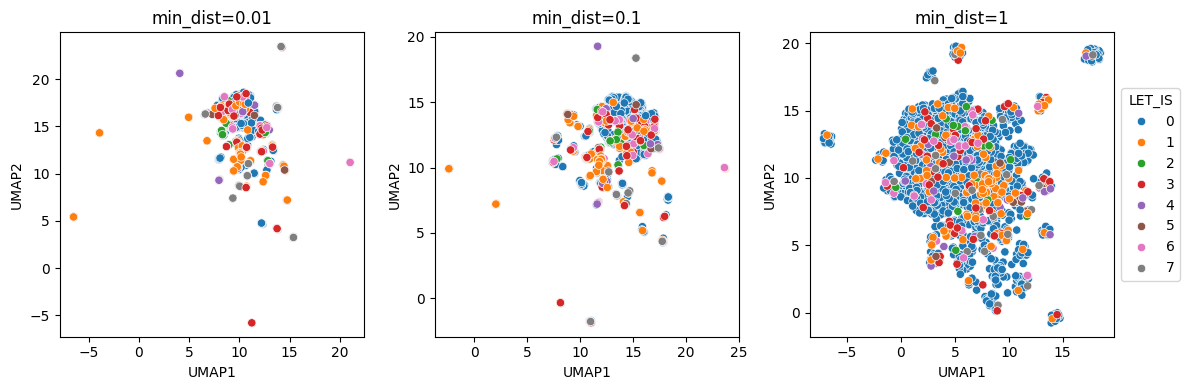

In [ ]:
#Adjusting min_dist parameter to alter UMAP output
i=1
ncol=3
nrow=1
plt.figure(figsize=(12, 4))

for n in [0.01,0.1,1]:
  plt.subplot(nrow, ncol, i)
  reducer=umap.UMAP(min_dist=n,random_state=10)
  umap_embedding = reducer.fit_transform(scaled_noCats)
  umap_embedding=pd.DataFrame(data=umap_embedding)
  umap_embedding.columns=["UMAP1","UMAP2"]
  umap_embedding["LET_IS"]=y.LET_IS.astype("category")
  sns.scatterplot(data=umap_embedding,x="UMAP1",y="UMAP2",hue="LET_IS").set(title=f"min_dist={n}")
  plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),ncol=1,title="LET_IS")
  if i!=3:
    plt.legend().remove()
  i+=1

plt.tight_layout()
plt.savefig('UMAP_mindist.png')
# plt.legend(loc='center left', bbox_to_anchor=(1, 0.5),ncol=1,title="LET_IS")
plt.show()


# plt.savefig('UMAP_mindist.png')

In [ ]:
import os
print( os.getcwd() )
print( os.listdir() )

from google.colab import files
# files.download('NonCat_data_PCA_scree.png')
# files.download('PCA_pairplot.png')
# files.download('UMAP_nneighbors.png')
# files.download('UMAP_mindist.png' )

/content
['.config', 'NonCat_data_PCA_scree.png', 'data-distance-matrices.png', 'PCA_pairplot.png', 'UMAP_nneighbors.png', 'PCA.png', 'drive', 'UMAP_mindist.png', 'sample_data']


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

# Imputing Missing Data



Before imputing missing data, we first need to compute the percent of mssing data for each variable.

In [ ]:
myocardial_infarction_complications = fetch_ucirepo(id=579)
X = myocardial_infarction_complications.data.features # Split features vs predictors

## Visualize Missing Data

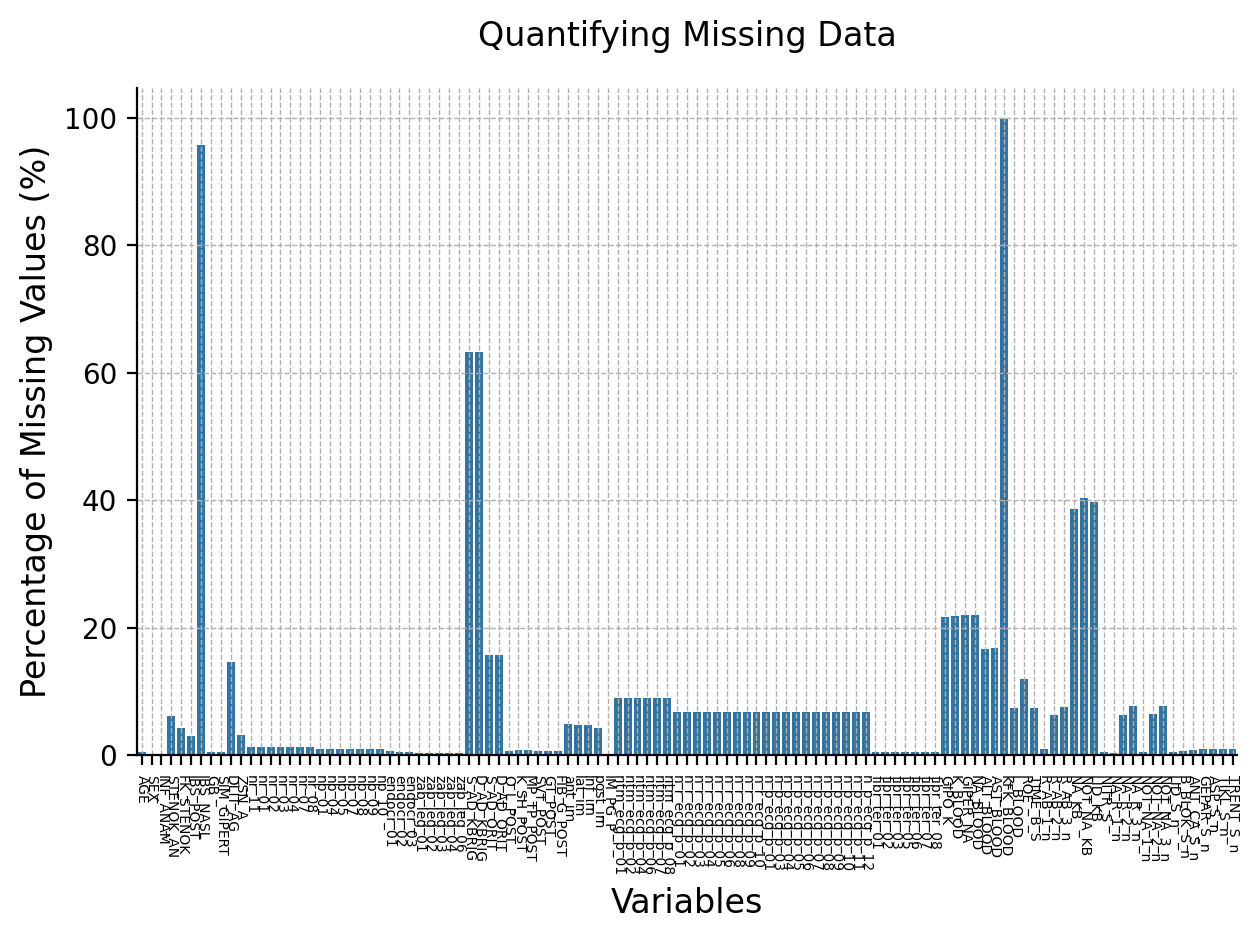

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate percentage of missing data for each variable
percent_missing = X.isnull().mean() * 100  # Scale to percentage

# Set up the figure
fig, ax = plt.subplots(dpi=200)
sns.barplot(x=percent_missing.index,
            y=percent_missing.values,
            ax=ax
            )

# Add styling and labels
ax.grid(True, which='both', linestyle='--', linewidth=0.5)
ax.tick_params(axis='x', labelsize=5, rotation=-90)
ax.set_title('Quantifying Missing Data', fontsize=12, pad=15)
ax.set_ylabel('Percentage of Missing Values (%)', fontsize=12)
ax.set_xlabel('Variables', fontsize=12)

# Improve layout, remove borders, save, and display
plt.tight_layout()
sns.despine()
plt.savefig('missing-data.png', bbox_inches='tight')
plt.show()


## Naive Repalcement of Missing Data

In [ ]:
X = X.fillna(0) # This can be changed based on how we handle missing data (@Kate)
y = y.fillna(0)

## SVD Guided Replacement of Missing Data

In [ ]:
import numpy as np
import pandas as pd

def svd_impute(data):
    nan_mask = np.isnan(data)
    filled_data = data.copy()

    # Perform an initial guess for missing values using column means
    col_means = np.nanmean(filled_data, axis=0)
    filled_data[nan_mask] = np.take(col_means, np.where(nan_mask)[1])

    # Set a convergence threshold and provide a maximum for iterations
    threshold = 1e-5
    max_iterations = 100
    prev_filled_data = None

    for _ in range(max_iterations):
        # Perform SVD on filled data
        U, s, Vt = np.linalg.svd(filled_data, full_matrices=False)

        # Select a number of singular values to use for reconstruction
        # In this case, it's the original number of singular values; you might wish to reduce it
        S = np.diag(s)

        # Reconstruct the complete matrix
        reconstructed_data = U.dot(S).dot(Vt)

        # Only update missing data values
        filled_data[nan_mask] = reconstructed_data[nan_mask]

        # Check for convergence by calculating Frobenius norm, a way to quantify change between iterations
        if prev_filled_data is not None and np.linalg.norm(filled_data - prev_filled_data, ord='fro') < threshold:
            break

        prev_filled_data = filled_data.copy()

    return filled_data

# Assume 'dataset' is a pandas DataFrame with missing values represented by np.nan
# Impute them using our custom SVD impute function
imputed_data = svd_impute(X.to_numpy())

# Convert the numpy array back to a pandas DataFrame
imputed_dataset = pd.DataFrame(imputed_data) #, columns=dataset.columns, index=dataset.index)

# Show the first few rows of the imputed dataset
print(imputed_dataset.head())


    0    1    2    3    4    5    6    7    8    9    ...  101  102  103  104  \
0  77.0  1.0  2.0  1.0  1.0  2.0  0.0  3.0  0.0  7.0  ...  0.0  0.0  0.0  1.0   
1  55.0  1.0  1.0  0.0  0.0  0.0  0.0  0.0  0.0  0.0  ...  1.0  0.0  0.0  1.0   
2  52.0  1.0  0.0  0.0  0.0  2.0  0.0  2.0  0.0  2.0  ...  3.0  2.0  2.0  1.0   
3  68.0  0.0  0.0  0.0  0.0  2.0  0.0  2.0  0.0  3.0  ...  0.0  0.0  0.0  0.0   
4  60.0  1.0  0.0  0.0  0.0  2.0  0.0  3.0  0.0  7.0  ...  0.0  0.0  0.0  0.0   

   105  106  107  108  109  110  
0  0.0  0.0  1.0  1.0  0.0  0.0  
1  0.0  1.0  1.0  1.0  0.0  1.0  
2  1.0  0.0  1.0  1.0  0.0  0.0  
3  0.0  1.0  1.0  1.0  0.0  0.0  
4  0.0  1.0  0.0  1.0  0.0  1.0  

[5 rows x 111 columns]


## Soft Impute Guided Replacement of Missing Data

In [ ]:
# Install dependencies
!pip install fancyimpute

# Import necessary libraries
import requests
import pandas as pd
from fancyimpute import SoftImpute
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

# Download the CSV file from the URL
csv_url = "https://archive.ics.uci.edu/static/public/579/data.csv"
response = requests.get(csv_url)
response.raise_for_status() # Raises an HTTPError for bad responses

# Load the data into a pandas DataFrame
from io import StringIO
data = pd.read_csv(StringIO(response.text), sep=',')
print("Original Data:")
print(data.head())

# Define categorical columns and convert them to categorical type
categorical_columns = ['ID', 'AGE', 'SEX', 'INF_ANAM', 'STENOK_AN', 'FK_STENOK',
                       'IBS_POST', 'IBS_NASL', 'GB', 'SIM_GIPERT', 'JELUD_TAH',
                       'FIBR_JELUD', 'A_V_BLOK', 'OTEK_LANC', 'RAZRIV', 'DRESSLER',
                       'ZSN', 'REC_IM', 'P_IM_STEN', 'LET_IS']
data[categorical_columns] = data[categorical_columns].astype('category')

# Apply OneHotEncoder to the categorical columns
encoder = OneHotEncoder(sparse_output=False, drop='first')
data_encoded = encoder.fit_transform(data[categorical_columns])
encoded_feature_names = encoder.get_feature_names_out(categorical_columns)
data_encoded_df = pd.DataFrame(data_encoded, columns=encoded_feature_names, index=data.index)
print("Encoded Categorical Data:")
print(data_encoded_df.head())

# Scale the numerical data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data.drop(columns=categorical_columns))

# Combine scaled numerical data and encoded categorical data
data_prepared = pd.concat([pd.DataFrame(data_scaled, index=data.index, columns=data.drop(columns=categorical_columns).columns),
                           data_encoded_df], axis=1)
print("Prepared Data:")
print(data_prepared.head())

# Perform imputation using SoftImpute
soft_impute = SoftImpute()
data_imputed = soft_impute.fit_transform(data_prepared)
print("Imputed Data (Scaled):")
print(pd.DataFrame(data_imputed, columns=data_prepared.columns, index=data_prepared.index).head())

# Rescale the imputed data back to the original scale
data_imputed_original_scale = scaler.inverse_transform(data_imputed[:, :len(data_scaled[0])])
data_combined = pd.concat([pd.DataFrame(data_imputed_original_scale, index=data.index, columns=data.drop(columns=categorical_columns).columns),
                           pd.DataFrame(data_imputed[:, len(data_scaled[0]):], index=data.index, columns=encoded_feature_names)], axis=1)
print("Final Imputed Data:")
print(data_combined.head())

# Save the imputed dataset to a new CSV file
data_combined.to_csv('imputed_data.csv', index=False)

  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 154.7/154.7 kB 5.2 MB/s eta 0:00:00
  Created wheel for fancyimpute: filename=fancyimpute-0.7.0-py3-none-any.whl size=29879 sha256=e88a4a8314a757c2f182e55d1cc0d8ec330cc1897d3d9075b5fc545a4d37144b
  Stored in directory: /root/.cache/pip/wheels/7b/0c/d3/ee82d1fbdcc0858d96434af108608d01703505d453720c84ed
  Created wheel for knnimpute: filename=knnimpute-0.1.0-py3-none-any.whl size=11329 sha256=bfd9aada24dd4fc1ff244e491a690656824268c4fe4481ceaf6cc2d952f1ad38
  Stored in directory: /root/.cache/pip/wheels/46/06/a5/45a724630562413c374e29c08732411d496092408b3a7bf754
Successfully built fancyimpute knnimpute
Original Data:
   ID   AGE  SEX  INF_ANAM  STENOK_AN  FK_STENOK  IBS_POST  IBS_NASL   GB  \
0   1  77.0    1       2.0        1.0        1.0       2.0       NaN  3.0   
1   2  55.0    1       1.0        0.0        0.0       0.0       0.0  0.0   
2   3  52.0    1     

## Other Considerations

In [ ]:
X.to_numpy()

array([[77.,  1.,  2., ...,  1.,  0.,  0.],
       [55.,  1.,  1., ...,  1.,  0.,  1.],
       [52.,  1.,  0., ...,  1.,  0.,  0.],
       ...,
       [55.,  1.,  3., ...,  1.,  0.,  0.],
       [79.,  0.,  2., ...,  1.,  0.,  0.],
       [63.,  1.,  2., ...,  0.,  0.,  0.]])

#Data Reduction

Space for data reduction and visualization code

# Training and Evaluating Models


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn import tree
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_classification

from keras.models import Sequential
from keras.layers import Dense

In [ ]:
# Choose a target to predict
y = y['FIBR_PREDS']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    test_size=0.4,  # We can change this
                                                    random_state=42 # We can change this
                                                    )

### Classification

Classification, also known as supervised learning, is a form of machine learning where a model is given a training set of labeled data and must predict the labels of data in a test set. This means the data is of the form:

$$ S_n = \{ (x_i, y_i) \}, $$

where each feature vector $x_i$ is associated with a label $y_i$.

Classification models are trained to predict the appropriate value of $y_i$ based on the information in the feature vector $x_i$.

Several such predictors exist including both parametric and nonparametric models. We outline how five simple models can learn to classify unseen data based upon a training set.


**K-Nearest Neighbors**

The K Nearest Neighbor (KNN) is perhaps the simplest classification algorithm, making it a good first choice. This algorithm is non-parametric, meaning that using this algorithm doesn't require a user to build a complex model or learn parameters from data. Instead, to classify and predict the labels of unknown data, the KNN algorithm considers the similarity between the unknown data and labeled data points.

For an unknown example $x$, the KNN algorithm assesses similarity between the feature vector $x$ and all known labeled data points. It predicts the most common label among the $k$ nearest neighbors of $x$. To determine which of the known or labeled data are most similar or nearest to $x$, the KNN algorithm uses a distance metric, such as those considered above.

In the `sklearn` library, the KNN algorithm is implemented in the `KNeighborsClassifier` method. This method requires only 2 arguments or parameters from the user:
* `n_neighbors`: is the number of neighbors that each unknown datapoint must be compared to
* `metric`: is the distance measure that is used to compare the similarity of different datapoints.

In this code, we use the KNN algorithm to make classifications for our test data.

In [ ]:
# K-Nearest Neighbors
knn_model = KNeighborsClassifier(n_neighbors=1, metric='minkowski')
knn_model.fit(X_train, y_train)
knn_predictions = knn_model.predict(X_test)
knn_accuracy = accuracy_score(y_test, knn_predictions)
print("K-Nearest Neighbors Accuracy:", knn_accuracy)

K-Nearest Neighbors Accuracy: 0.8279411764705882


**Naive Bayes Model**

Naive Bayes Model is a probabilistic machine learning model based on Bayes' theorem. Central to this model is the assumption that all measurements or features are independent; however, this assumption is often violated. This model is effective for large feature sets and is widely used for classification tasks, and this model was commonly used in text classification or language processing when a light weight model is desired.

The model calculates the probability of each class given a set of features and predicts the class with the highest probability. It is known for its robustness in the presence of irrelevant features and works well with high-dimensional data. The "naive" assumption in Naive Bayes is that features are conditionally independent given the class, which simplifies the calculation of the joint probability.

In `sklearn` this model is implemented with the `GaussianNB` method. Unlike the KNN algorithm, the Naive Bayes Classifier is parametric, meaning that parameters for a probability distribution are learned during training time. However, when no information about this distribution are known, no parameters or arguments are required to construct the model.

In [ ]:
# Naive Bayes
nb_model = GaussianNB()
nb_model.fit(X_train, y_train)
nb_predictions = nb_model.predict(X_test)
nb_accuracy = accuracy_score(y_test, nb_predictions)
print("Naive Bayes Accuracy:", nb_accuracy)

**Decision Trees**

Decision trees are a type of classification algorithm that are popular due to their interprtability and simple proceedure. The algorithm works by iteraticely splitting data into subsets based on the values of different features or measurements. This iterative process forms a tree like structure, where at each node or branching point of the tree, a decision is made by evaluating a feature and splitting the data into two branches. At the bottom or leaf nodes of the tree, the data has been split up so many times that the model makes a single prediction on the class or label of all unseen data that arrive at that leaf/

Decision trees borrow measures from information theory, such as entropy or the Gini index, to determine the best feature and threshold for splitting the data at each node. Entropy measures the uncertainty or disorder of a set of data points, while the Gini index measures how often a randomly chosen element would be incorrectly labeled if it was randomly labeled according to the distribution of labels in the node. The algorithm selects the feature and threshold that minimize entropy or the Gini index, resulting in a split that maximizes the similarity in the data that follow each branch of the decision tree.

The `DecisionTreeClassifier` function in the sklearn library constructs a decision tree for classification tasks. It uses entropy as the criterion to measure the quality of splits and employs a random strategy for choosing the best split at each node. The tree is limited to a maximum depth of 5 levels, and leaf nodes must contain at least 10 samples.

- `criterion` Determines the function to measure the quality of a split. In this case, 'entropy' is used, which calculates the information gain based on the entropy.
- `splitter` Specifies the strategy used to choose the split at each node. 'random' means that random splits are considered, as opposed to 'best' which would choose the best split.
- `max_depth` Limits the maximum depth of the tree. Tree growth is halted once this depth is reached.
- `min_samples_leaf`: Specifies the minimum number of samples required to be at a leaf node. If a split results in a leaf node with fewer samples than this, the split is not considered valid.









In [ ]:
dt_model = DecisionTreeClassifier(criterion='entropy', splitter='random', max_depth=5, min_samples_leaf=10)
dt_model.fit(X_train, y_train)
dt_predictions = dt_model.predict(X_test)
dt_accuracy = accuracy_score(y_test, dt_predictions)
print("Decision Tree Accuracy:", dt_accuracy)

Decision Tree Accuracy: 0.884313725490196


**Random Forests**

Random Forest is an ensemble learning method that operates by constructing a group of decision trees. During training, each decision tree is trained independently, and when predicting, the Random Forset allows the decision trees to each make a prediction and then vote on what the Random Forest should predict. This model improves the decision tree model by averaging multiple decision trees, which helps to reduce overfitting and improve the overall performance and robustness of the model.

Random Forest uses a technique called bagging, or bootstrap aggregating, to achieve this ensemble of trees. Bagging involves training each tree on a random subset of the training data, sampled with replacement. This introduces diversity among the trees, making them less correlated and thus reducing the variance of the model. At each node of the trees in the Random Forest, a subset of features is also randomly selected to determine the best split, further adding to the diversity.

The `RandomForestClassifier` method in sklearn is used to build these classifiers. This particular instance of the model below is configured with 100 decision trees, uses entropy as the criterion to measure the quality of splits, allows each tree to grow to a maximum depth of 10 levels, and requires at least 1 sample in each leaf node.

* `n_estimators`: Specifies the number of trees in the forest.
* `criterion`: Determines the function to measure the quality of a split. In this case, 'entropy' is used, which calculates the information gain based on the entropy.
* `max_depth`: Limits the maximum depth of each tree in the forest. Tree growth is halted once this depth is reached.
* `min_samples_leaf`: Specifies the minimum number of samples required to be at a leaf node. If a split results in a leaf node with fewer samples than this, the split is not considered valid.


In [ ]:
# Random Forest
rf_model = RandomForestClassifier(n_estimators=100, criterion='entropy', max_depth=10, min_samples_leaf=1)
rf_model.fit(X_train, y_train)
rf_predictions = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_predictions)
print("Random Forest Accuracy:", rf_accuracy)

Random Forest Accuracy: 0.888235294117647


**Support Vector Machines**

Support Vector Machines (SVMs) are powerful classification models and our first step towards deep learning. A byproduct of statistical learning theory, the SVM is based on the idea of finding the best straight line to separate data with different labels.

At its core, an SVM performs classification by finding the hyperplane that best separates two classes in an N-dimensional space (where N is the number of features). This hyperplane is chosen to maximize the margin between the two classes, meaning it maximizes the distance between the nearest data points of each class, which are called support vectors. This margin maximization approach makes SVMs robust and less prone to overfitting, as it seeks to find the most generalizable decision boundary.

The key idea here, similar to KNN, is that each of our data points $x_i$ can be represented as a high dimensional vector. Then, by considering their distances and positioning in space, we can separate our space into different regions with different labels.

In `sklearn` this SVM is implemented with the `SVC method`. Here, we first consider the SVM by representing our data with 111 features in 111 dimensional space using the standard distance. Later, we will see again how modifying the distance measure can be used to improve our classification.

In [ ]:
svm_model = SVC(max_iter=1000)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.888235294117647


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


**Kernel Learning**

Kernels, in machine learning, extend the distance measures considered above to high dimensional spaces. When data is not linearly separable, which is often the case, a SVM will fail to classify data appropriately. To remedy this, kernels transform data into a higher-dimensional space where the labeled classes are more likely to be linearly separable.

One way to understand kernels is through their relationship to distance measures. In simple terms, a kernel can be thought of as a function that quantifies how "close" or "similar" two data points are in some feature or measurement space. However, this feature space is not necessarily the measurements found in your data. By using a kernel function, SVMs can implicitly compute the distance between two datapoints in a higher-dimensional space without explicitly calculating the coordinates of the data points. This allows SVMs to efficiently find optimal separating hyperplanes even in high-dimensional or non-linearly separable datasets.

In `sklearn`, the `SVC` class is equipped with several choices of kernels. By default, the `rbf` kernel function is used, and this is what we used in the example above. Several other options include the `poly`, `rbf`, `sigmoid`, `precomputed` kernels, and to see how well the model performs without a kernel function, we can use the `linear` option as well.

In [ ]:
svm_model = SVC(kernel='linear', max_iter=1000)
svm_model.fit(X_train, y_train)
svm_predictions = svm_model.predict(X_test)
svm_accuracy = accuracy_score(y_test, svm_predictions)
print("SVM Accuracy:", svm_accuracy)

SVM Accuracy: 0.6941176470588235


/usr/local/lib/python3.10/dist-packages/sklearn/svm/_base.py:297: ConvergenceWarning: Solver terminated early (max_iter=1000).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


**Neural Networks**

Neural networks are a popular machine learning model that are the basis of many recent developments such as chatGPT, foundation models, and other large language models. Inspired from biology, artificial neural networks mimic the connected network fo neurons in the brain.

Artificial neural networks consist of interconnected layers of nodes, or neurons, that process input data and learn to extract features and patterns. Each neuron computes a weighted sum of its inputs, applies a nonlinear activation function to the result, and passes the output to the next layer of neurons. Deep learning is based on neuaral networks with multiple layers. The training or learning process in neural networks involves adjusting the weights of connections between neurons based on the error in the model's predictions, a process known as backpropagation.

In a sense, neural networks are like a group of SVMs that have been chained together. The Perceptron Algorithm, which predated the SVM by six years, attempts to find a linear boundry between data, similar to the SVM. While a single perceptron alone is not powerful, the neural network is based around the idea of chaining a large group of perceptron classifiers together and introducing nonlinear terms to learn more complicated decision boundaries than a single perceptron could learn alone. Today, many variets and architectures of neuaral networks have been developed for different tasks such as image or natural language processing, but they are all based on a similar design of connected perceptrons.

In the below code, we define and compile a simple feedforward neural network model using Keras and TensorFlow to solve the same classification problem we have considered above. The neural network architecture includes a configurable number of nodes in the first hidden layer, an optional activation function specification, and uses the Adam optimizer with binary crossentropy loss for training or learning the parameters. This setup is suitable for many classification problems and can be further adjusted by modifying the parameters of the `build_model` function below.

In [ ]:
def build_model(input_dim,                       # int
                first_hidden_layer_node_num = 4, # int
                activation_function='sigmoid'    # str
               ):
    model = Sequential()
    model.add(Dense(first_hidden_layer_node_num, input_dim=input_dim, activation='tanh'))
    model.add(Dense(20, activation='tanh'))
    model.add(Dense(1, activation=activation_function))
    model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
    return model

Calling the function we just created, we initialize a simple feedforward neural network. The model is configured with an input dimension matching the number of features in the training data (`X_train.shape[1]`), a first hidden layer containing 4 nodes, and a sigmoid activation function in the output layer.

In [ ]:
model = build_model(input_dim = X_train.shape[1],
                    first_hidden_layer_node_num = 12,
                    activation_function='sigmoid')

The `fit` method is used to train our neural network. During training, the model iterates over the training data (`X_train` and `y_train`) for a specified number of epochs, which is 25 in this case. An epoch refers to one complete forward and backward pass of all the training examples. The `batch_size` parameter defines the number of samples that will be propagated through the network at a time before updating the model parameters. In this example, each batch consists of 100 samples. During training, the model adjusts its weights and biases using the Adam optimizer and minimizes the binary crossentropy loss function to improve its predictive accuracy. As training progresses, the model's performance metrics, such as accuracy, are computed and can be evaluated on the validation set to monitor the model's progress and performance.


In [ ]:
model.fit(X_train,
          y_train,
          epochs=25,
          batch_size=10)

Epoch 1/25
102/102 [==============================] - 1s 2ms/step - loss: 0.4878 - accuracy: 0.7725
Epoch 2/25
102/102 [==============================] - 0s 2ms/step - loss: 0.3411 - accuracy: 0.8971
Epoch 3/25
102/102 [==============================] - 0s 2ms/step - loss: 0.3330 - accuracy: 0.8980
Epoch 4/25
102/102 [==============================] - 0s 2ms/step - loss: 0.3286 - accuracy: 0.8980
Epoch 5/25
102/102 [==============================] - 0s 2ms/step - loss: 0.3264 - accuracy: 0.8980
Epoch 6/25
102/102 [==============================] - 0s 2ms/step - loss: 0.3269 - accuracy: 0.8980
Epoch 7/25
102/102 [==============================] - 0s 2ms/step - loss: 0.3255 - accuracy: 0.8980
Epoch 8/25
102/102 [==============================] - 0s 2ms/step - loss: 0.3235 - accuracy: 0.8980
Epoch 9/25
102/102 [==============================] - 0s 2ms/step - loss: 0.3244 - accuracy: 0.8980
Epoch 10/25
102/102 [==============================] - 0s 2ms/step - loss: 0.3230 - accuracy: 0.8980

In [ ]:
lossValue, accuracy = model.evaluate(X_test, y_test)
print("%.2f%%" % (100 * accuracy))

22/22 [==============================] - 0s 1ms/step - loss: 0.3126 - accuracy: 0.9029
90.29%


## Model Comparisons

In [ ]:
from sklearn.model_selection import cross_val_score, GridSearchCV, StratifiedKFold
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, make_scorer
from sklearn.model_selection import cross_validate


In [ ]:
# Define cross-validation strategy
cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

# Models and parameters
knn = KNeighborsClassifier()
decision_tree = DecisionTreeClassifier(random_state=42)
nn = MLPClassifier(max_iter=500, random_state=42)

### Cross Model Comparisons

In [ ]:
# Cross-validation scores for each model
knn_scores = cross_val_score(knn, X, y, cv=cv, scoring='accuracy')
tree_scores = cross_val_score(decision_tree, X, y, cv=cv, scoring='accuracy')
nn_scores = cross_val_score(nn, X, y, cv=cv, scoring='accuracy')

# Visualization 2: Model Comparison (KNN, Decision Tree, Neural Network)
model_scores = {
    'Model': ['KNN'] * 5 + ['Decision Tree'] * 5 + ['Neural Network'] * 5,
    'Accuracy': np.concatenate([knn_scores, tree_scores, nn_scores])
}
model_scores_df = pd.DataFrame(model_scores)

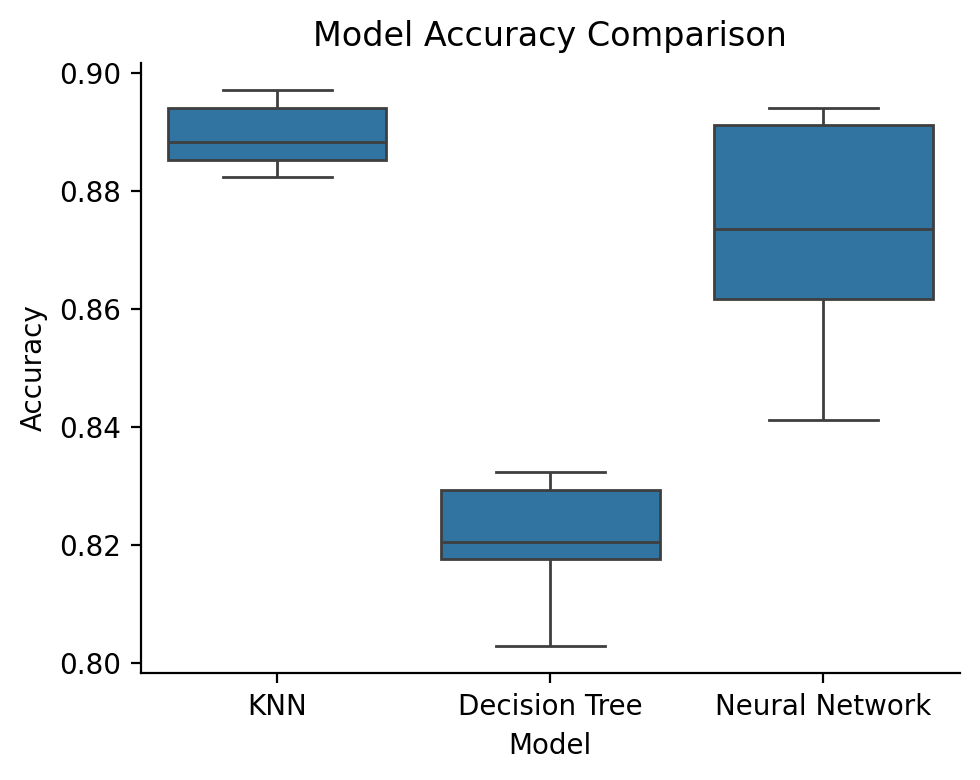

In [ ]:
plt.figure(figsize=(5, 4), dpi=200)
sns.boxplot(data=model_scores_df, x='Model', y='Accuracy')
plt.title("Model Accuracy Comparison")
plt.ylabel("Accuracy")
sns.despine()
plt.tight_layout()
plt.savefig('model-comparison.png')
plt.show()


### Multi-metric Comparison

In [ ]:
# Evaluate the KNN model using various metrics
metrics = {
    'accuracy': make_scorer(accuracy_score),
    'precision': make_scorer(precision_score, average='weighted'),
    'recall': make_scorer(recall_score, average='weighted'),
    'f1': make_scorer(f1_score, average='weighted')
}
KNN_scores_cv = cross_validate(knn, X, y, cv=cv, scoring=metrics)

# Visualization 3: KNN Performance Metrics
KNN_metrics = {
    'Metric': ['Accuracy', 'Precision', 'Recall', 'F1'],
    'Score': [(KNN_scores_cv['test_accuracy']),
              (KNN_scores_cv['test_precision']),
              (KNN_scores_cv['test_recall']),
              (KNN_scores_cv['test_f1'])]
}
KNN_metrics_df = pd.DataFrame(KNN_metrics)
KNN_metrics_df = KNN_metrics_df.explode('Score', ignore_index=True)

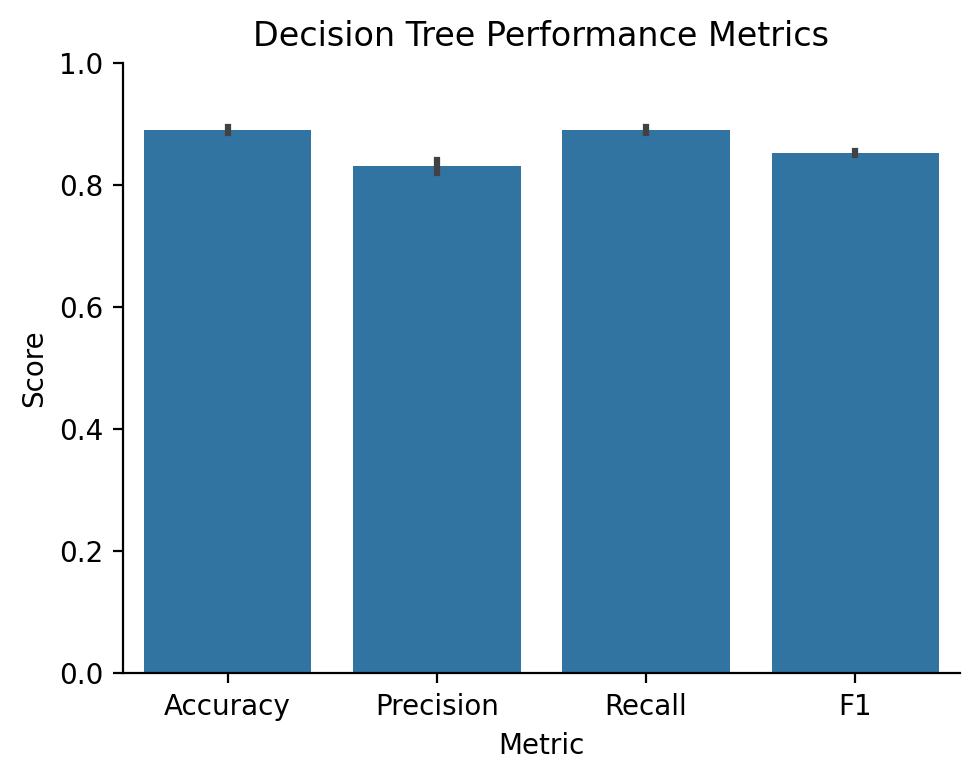

In [ ]:
plt.figure(figsize=(5,4), dpi=200)
sns.barplot(data=KNN_metrics_df, x='Metric', y='Score')
plt.title("Decision Tree Performance Metrics")
plt.ylabel("Score")
plt.ylim(0, 1)
sns.despine()
plt.tight_layout()
plt.savefig('metric-comparison.png')
plt.show()
